In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2

In [2]:
DATA_PATH = 'E:\Lenguajes de programacion\Curso Machine Learning\Infrared-Solar-Modules-Classifier\Data/2020-02-14_InfraredSolarModules'
METADATA_PATH = os.path.join(DATA_PATH, 'module_metadata.json')

In [3]:
df = pd.read_json(METADATA_PATH, orient='index').sort_index()
df['image_filepath'] = df.image_filepath.apply(lambda x: os.path.join(DATA_PATH, x))
df

,image_filepath,anomaly_class
0,E:\Lenguajes de programacion\Curso Machine Lea...,Offline-Module
1,E:\Lenguajes de programacion\Curso Machine Lea...,Offline-Module
2,E:\Lenguajes de programacion\Curso Machine Lea...,Offline-Module
3,E:\Lenguajes de programacion\Curso Machine Lea...,Offline-Module
4,E:\Lenguajes de programacion\Curso Machine Lea...,Offline-Module
...,...,...
19995,E:\Lenguajes de programacion\Curso Machine Lea...,No-Anomaly
19996,E:\Lenguajes de programacion\Curso Machine Lea...,No-Anomaly
19997,E:\Lenguajes de programacion\Curso Machine Lea...,No-Anomaly
19998,E:\Lenguajes de programacion\Curso Machine Lea...,No-Anomaly


There's a class imbalance in the data.
But only between anomalies.

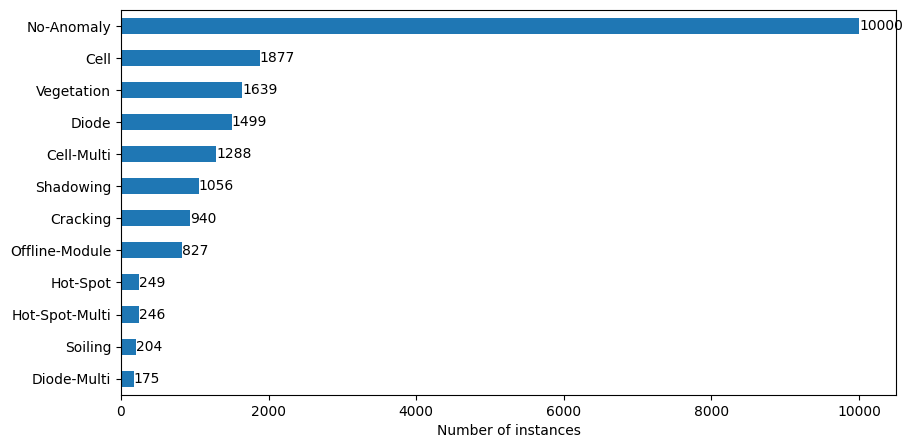

In [4]:
ax = df.anomaly_class.value_counts().sort_values(ascending=True).plot.barh(figsize=(10,5))
ax.bar_label(ax.containers[0])
ax.set_xlabel('Number of instances')
plt.show()

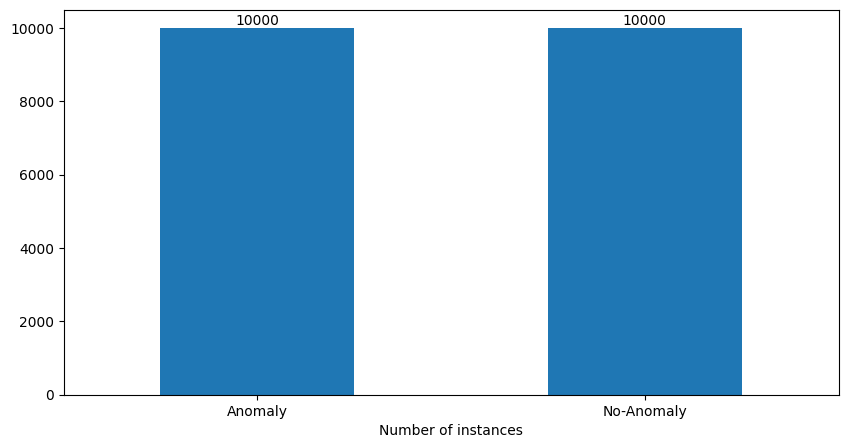

In [5]:
def convert_to_binary(x):
    x = 'Anomaly' if x != 'No-Anomaly' else x
    return x

ax = df.anomaly_class.apply(convert_to_binary).value_counts().plot.bar(figsize=(10,5))
ax.tick_params(labelrotation=0)
ax.bar_label(ax.containers[0])
ax.set_xlabel('Number of instances')
plt.show()

In [6]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import preprocess_input
import numpy as np

In [7]:
sample = df.groupby('anomaly_class').sample()
print(sample)
print(sample.iloc[2, 0])

                                          image_filepath   anomaly_class
6675   E:\Lenguajes de programacion\Curso Machine Lea...            Cell
3981   E:\Lenguajes de programacion\Curso Machine Lea...      Cell-Multi
7507   E:\Lenguajes de programacion\Curso Machine Lea...        Cracking
2143   E:\Lenguajes de programacion\Curso Machine Lea...           Diode
895    E:\Lenguajes de programacion\Curso Machine Lea...     Diode-Multi
6750   E:\Lenguajes de programacion\Curso Machine Lea...        Hot-Spot
7972   E:\Lenguajes de programacion\Curso Machine Lea...  Hot-Spot-Multi
11862  E:\Lenguajes de programacion\Curso Machine Lea...      No-Anomaly
10     E:\Lenguajes de programacion\Curso Machine Lea...  Offline-Module
3437   E:\Lenguajes de programacion\Curso Machine Lea...       Shadowing
8300   E:\Lenguajes de programacion\Curso Machine Lea...         Soiling
8987   E:\Lenguajes de programacion\Curso Machine Lea...      Vegetation
E:\Lenguajes de programacion\Curso Machine Learning

In [8]:
image_path= sample.iloc[2, 0]
print(image_path)

E:\Lenguajes de programacion\Curso Machine Learning\Infrared-Solar-Modules-Classifier\Data/2020-02-14_InfraredSolarModules\images/7507.jpg


In [9]:
# Cargar el modelo preentrenado VGG16
vgg16 = VGG16(weights='imagenet')

# Cargar y preprocesar la imagen de entrada
img = image.load_img(image_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Obtener las características de la imagen
features = vgg16.predict(x)

# Imprimir las dimensiones de las características extraídas
print(features)

1/1 [==============================] - 0s 269ms/step
[[1.83491538e-05 1.06325559e-03 2.70757329e-04 1.79034774e-04
  3.03726702e-04 1.14683862e-04 2.40531575e-04 2.48595403e-04
  1.30008440e-04 3.69039917e-04 5.79307496e-04 9.46970598e-04
  1.48255914e-03 1.70291495e-03 8.56077357e-04 5.94460173e-04
  9.53755807e-04 3.24467081e-04 1.11279765e-03 8.86324851e-04
  5.97244303e-04 1.48978969e-03 1.16713892e-03 1.30743522e-03
  4.30842221e-04 7.06391438e-05 2.75176688e-04 1.59028525e-04
  3.41226041e-05 2.04093390e-04 6.25691173e-05 2.60445842e-04
  4.58177783e-05 1.38622185e-04 1.38432806e-04 1.08730797e-04
  7.07169005e-04 5.55259212e-05 8.28068660e-05 1.74681001e-04
  4.20017750e-04 7.19596064e-05 1.73398410e-04 5.52716410e-05
  1.32681089e-04 1.72481406e-04 6.59372774e-04 1.65954916e-04
  1.54264548e-04 1.26482453e-04 7.38531176e-04 8.81508095e-05
  8.94480036e-05 1.67705191e-04 1.28808810e-04 3.33750824e-04
  1.49727945e-04 5.19934365e-05 6.32195792e-04 4.06686362e-04
  3.07174778e-04 